## Plots GNN Results

### Librerias

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import pickle
import os

### Variables

In [2]:
## Lista de variables

#accuracyVsHops_test  
#accuracyVsHops_train  
#logged_iterations  
#losses_test  
#losses_train  
#metrics_test  
#metrics_train  
  
#ElapsedTimesCGR  
#ElapsedTimesGNN  
#ArrivalTimesCGR  
#ArrivalTimesGNN  
#ArrivalTimesDirect  


# Paths - Scenarios
Paths= {'Scenario A':'Escenario 1/Results/Train_Result_Dataset_Escenario1_03-10-2022_2221_{}.pickle',
        'Scenario B':'Escenario 3/Results/Train_Result_Dataset_Escenario3_04-10-2022_0059_{}.pickle',
        'Scenario C':'Escenario 2/Results/Train_Result_Dataset_Escenario2_03-10-2022_1623_{}.pickle',
        'Scenario D':'Escenario 4/Results/Train_Result_Dataset_Escenario4_04-10-2022_0648_{}.pickle'}


### Loss functions and F1

In [3]:
# Load variables from files
variableName = 'losses_test'
Losses_test  = {}
for i,j in Paths.items():
    with open(j.format(variableName), 'rb') as file:
        Losses_test[i] = pickle.load(file)


variableName = 'losses_train'
Losses_train = {}
for i,j in Paths.items():
    with open(j.format(variableName), 'rb') as file:
        Losses_train[i] = pickle.load(file)


variableName = 'metrics_test'
Metrics_test  = {}
for i,j in Paths.items():
    with open(j.format(variableName), 'rb') as file:
        Metrics_test[i] = pickle.load(file)

variableName = 'metrics_train'
Metrics_train  = {}
for i,j in Paths.items():
    with open(j.format(variableName), 'rb') as file:
        Metrics_train[i] = pickle.load(file)


variableName      = 'logged_iterations'
Logged_iterations = {}
for i,j in Paths.items():
    with open(j.format(variableName), 'rb') as file:
        Logged_iterations[i] = pickle.load(file)

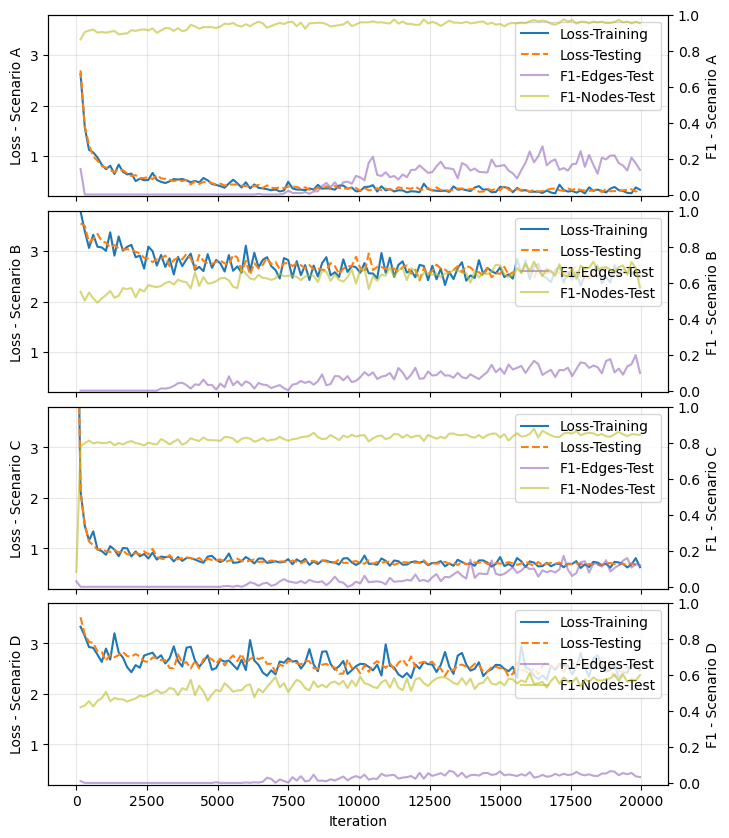

In [4]:
# Plots - Curvas de pérdida a lo largo del entrenamiento y del testing.

# Figura
fig, axes = plt.subplots(4, 1, sharex=True, num=1,figsize=(8, 10))
fig.subplots_adjust(hspace=0.08)
axes[3].set_xlabel("Iteration")

for i, scenarioName in enumerate(Paths.keys()):
    # Datos Loss and F1
    x = np.array(Logged_iterations[scenarioName])
    y_tr = Losses_train[scenarioName]
    y_te = Losses_test[scenarioName]
    y2_tr = pd.DataFrame(Metrics_train[scenarioName])
    y2_te = pd.DataFrame(Metrics_test[scenarioName])

    # Ejes Y 2
    axetwin = axes[i].twinx()
    #axetwin.plot(x, y2_tr['f1_edges'], color='tab:purple', linestyle='solid', label="F1-Edges-Train", alpha=0.6)
    axetwin.plot(x, y2_te['f1_edges'], color='tab:purple', linestyle='solid', label="F1-Edges-Test", alpha=0.6)
    #axetwin.plot(x, y2_tr['f1_nodes'], color='tab:olive', linestyle='solid', label="F1-Nodes-Train", alpha=0.6)
    axetwin.plot(x, y2_te['f1_nodes'], color='tab:olive', linestyle='solid', label="F1-Nodes-Test", alpha=0.6)
    axetwin.set_ylabel("F1 - {}".format(scenarioName))
    axetwin.set_ylim(-0.01, 1)
    
    # Ejes Y 1
    axes[i].plot(x, y_tr, color='tab:blue', linestyle='solid', label="Loss-Training")
    axes[i].plot(x, y_te, color='tab:orange', linestyle='dashed', label="Loss-Testing")
    axes[i].set_ylabel("Loss - {}".format(scenarioName))
    axes[i].set_ylim(0.2, 3.8)
    axes[i].grid(alpha=0.3)

    # legend
    handles1, labels1 = axes[i].get_legend_handles_labels()
    handles2, labels2 = axetwin.get_legend_handles_labels()
    axes[i].legend(handles=handles1+handles2,loc='upper right')


#plt.tight_layout()
plt.savefig('Losses&F1.png')
plt.show()



### ElapsedTime

In [5]:
# Load variables from files
variableName    = 'ElapsedTimesCGR'
ElapsedTimesCGR = {}
for i,j in Paths.items():
    with open(j.format(variableName), 'rb') as file:
        ElapsedTimesCGR[i] = pickle.load(file)

variableName    = 'ElapsedTimesGNN'
ElapsedTimesGNN = {}
for i,j in Paths.items():
    with open(j.format(variableName), 'rb') as file:
        ElapsedTimesGNN[i] = pickle.load(file)

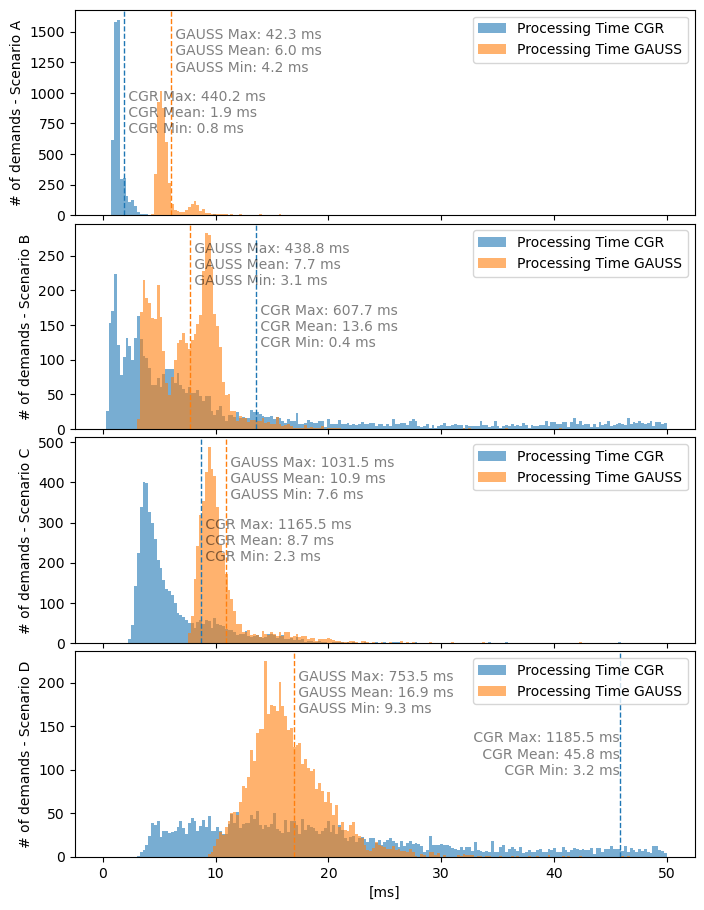

In [8]:
# Plots - ElapsedTime

# Figura
fig, axes = plt.subplots(4, 1, sharex=True, num=2,figsize=(8, 11))
fig.subplots_adjust(hspace=0.04)
axes[3].set_xlabel("[ms]")
bins1 = np.linspace(0, 50, 200)
bins2 = np.linspace(0, 50, 200)
for i, scenarioName in enumerate(Paths.keys()):
    # Datos - Compute statistical values
    elapsedTimesCGRMin  = min(ElapsedTimesCGR[scenarioName])
    elapsedTimesCGRMax  = max(ElapsedTimesCGR[scenarioName])
    elapsedTimesCGRMean = np.mean(ElapsedTimesCGR[scenarioName])
    elapsedTimesCGRStd  = np.std(ElapsedTimesCGR[scenarioName])
    elapsedTimesGNNMin  = min(ElapsedTimesGNN[scenarioName])
    elapsedTimesGNNMax  = max(ElapsedTimesGNN[scenarioName])
    elapsedTimesGNNMean = np.mean(ElapsedTimesGNN[scenarioName])
    elapsedTimesGNNStd  = np.std(ElapsedTimesGNN[scenarioName])
    ElapsedTimesGNN[scenarioName][0] = elapsedTimesGNNMean

    # Ejes
    #bins = np.linspace(min(elapsedTimesCGRMin, elapsedTimesGNNMin), max(elapsedTimesCGRStd, elapsedTimesGNNStd)*3, 100)
    if (i == 0) and (i== 2):
        bins = bins1
    else:
        bins = bins2
    axes[i].hist(ElapsedTimesCGR[scenarioName], bins, alpha=0.6, color='tab:blue', label="Processing Time CGR")
    axes[i].hist(ElapsedTimesGNN[scenarioName], bins, alpha=0.6, color='tab:orange', label="Processing Time GAUSS")

    # Marcadores
    min_ylim, max_ylim = axes[i].get_ylim()
    axes[i].axvline(elapsedTimesCGRMean, color='tab:blue', linestyle='dashed', linewidth=1)
    if i == 3:
        axes[i].text(elapsedTimesCGRMean, max_ylim*0.4, ' CGR Max: {:.1f} ms\n CGR Mean: {:.1f} ms\n CGR Min: {:.1f} ms'.format(
                     elapsedTimesCGRMax, elapsedTimesCGRMean, elapsedTimesCGRMin), horizontalalignment='right', alpha=0.5)
    else:
        axes[i].text(elapsedTimesCGRMean, max_ylim*0.4,' CGR Max: {:.1f} ms\n CGR Mean: {:.1f} ms\n CGR Min: {:.1f} ms'.format(
                     elapsedTimesCGRMax, elapsedTimesCGRMean, elapsedTimesCGRMin), alpha=0.5)

    
    axes[i].axvline(elapsedTimesGNNMean, color='tab:orange', linestyle='dashed', linewidth=1)
    axes[i].text(elapsedTimesGNNMean, max_ylim*0.7, ' GAUSS Max: {:.1f} ms\n GAUSS Mean: {:.1f} ms\n GAUSS Min: {:.1f} ms'.format(
                 elapsedTimesGNNMax, elapsedTimesGNNMean, elapsedTimesGNNMin), alpha=0.5)

    axes[i].set_ylabel("# of demands - {}".format(scenarioName))
    axes[i].legend(loc='upper right')

#plt.tight_layout()
plt.savefig('ElapsedTimes.png')
plt.show()

### ArrivalTime

In [9]:
# Load variables from files
variableName    = 'ArrivalTimesCGR'
ArrivalTimesCGR = {}
for i,j in Paths.items():
    with open(j.format(variableName), 'rb') as file:
        ArrivalTimesCGR[i] = pickle.load(file)

variableName    = 'ArrivalTimesGNN'
ArrivalTimesGNN = {}
for i,j in Paths.items():
    with open(j.format(variableName), 'rb') as file:
        ArrivalTimesGNN[i] = pickle.load(file)

variableName       = 'ArrivalTimesDirect'
ArrivalTimesDirect = {}
for i,j in Paths.items():
    with open(j.format(variableName), 'rb') as file:
        ArrivalTimesDirect[i] = pickle.load(file)

ScenarioName: Scenario A
CGR-Min: 0 	 CGR-Max: 42594 	 CGR-Mean: 12012.09
GNN-Min: 0 	 GNN-Max: 43192 	 GNN-Mean: 16715.309447558047
Direct-Min: 0 	 Direct-Max: 54316.0 	 Direct-Mean: 17481.806
------------------------------------
ScenarioName: Scenario B
CGR-Min: 0 	 CGR-Max: 43131 	 CGR-Mean: 8161.512
GNN-Min: 0 	 GNN-Max: 43197 	 GNN-Mean: 14926.39261884904
Direct-Min: 0 	 Direct-Max: 53387.0 	 Direct-Mean: 17361.1208
------------------------------------
ScenarioName: Scenario C
CGR-Min: 0 	 CGR-Max: 31678 	 CGR-Mean: 7260.1916
GNN-Min: 0 	 GNN-Max: 43128 	 GNN-Mean: 13965.519703940789
Direct-Min: 0 	 Direct-Max: 53424.0 	 Direct-Mean: 17899.856
------------------------------------
ScenarioName: Scenario D
CGR-Min: 0 	 CGR-Max: 29051 	 CGR-Mean: 4952.351
GNN-Min: 0 	 GNN-Max: 43191 	 GNN-Mean: 15919.732978723405
Direct-Min: 0 	 Direct-Max: 53841.0 	 Direct-Mean: 17640.3564
------------------------------------


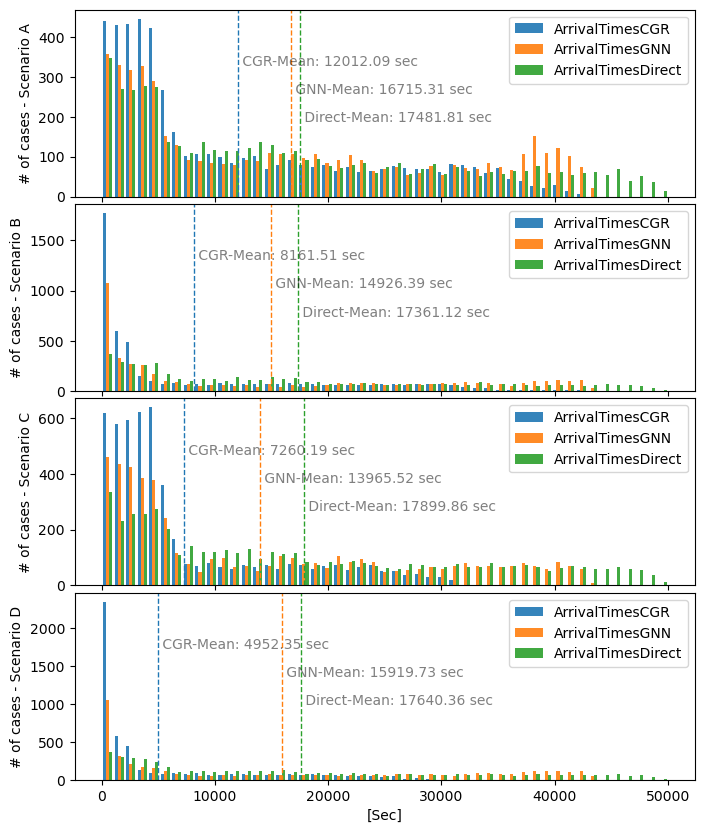

In [10]:
# Plots - ArrivalTimes

# Figura
fig, axes = plt.subplots(4, 1, sharex=True, num=3,figsize=(8, 10))
fig.subplots_adjust(hspace=0.04)
axes[3].set_xlabel("[Sec]")
bins = np.linspace(0, 50000, 50)

for i, scenarioName in enumerate(Paths.keys()):
    # Datos - Compute statistical values
    arrivalTimesGNN    = list(np.array(ArrivalTimesGNN[scenarioName])[np.array(ArrivalTimesGNN[scenarioName])!=None])
    arrivalTimesCGR    = ArrivalTimesCGR[scenarioName]
    arrivalTimesDirect = ArrivalTimesDirect[scenarioName]

    arrivalTimesCGRMin    = min(arrivalTimesCGR)
    arrivalTimesCGRMax    = max(arrivalTimesCGR)
    arrivalTimesCGRMean   = np.mean(arrivalTimesCGR)
    arrivalTimesGNNMin    = min(arrivalTimesGNN)
    arrivalTimesGNNMax    = max(arrivalTimesGNN)
    arrivalTimesGNNMean   = np.mean(arrivalTimesGNN)
    arrivalTimesDirectMin = min(arrivalTimesDirect)
    arrivalTimesDirectMax = max(arrivalTimesDirect)
    arrivalTimesDirectMean= np.mean(arrivalTimesDirect)

    print("ScenarioName: {}".format(scenarioName))
    print("CGR-Min: {} \t CGR-Max: {} \t CGR-Mean: {}".format(arrivalTimesCGRMin,arrivalTimesCGRMax,arrivalTimesCGRMean))
    print("GNN-Min: {} \t GNN-Max: {} \t GNN-Mean: {}".format(arrivalTimesGNNMin,arrivalTimesGNNMax,arrivalTimesGNNMean))
    print("Direct-Min: {} \t Direct-Max: {} \t Direct-Mean: {}".format(arrivalTimesDirectMin,arrivalTimesDirectMax,arrivalTimesDirectMean))
    print("------------------------------------")

    # Ejes
    axes[i].hist([arrivalTimesCGR, arrivalTimesGNN, arrivalTimesDirect], bins, alpha=0.9, histtype='bar',
            color=['tab:blue', 'tab:orange', 'tab:green'], label=["ArrivalTimesCGR", "ArrivalTimesGNN", "ArrivalTimesDirect"])


    # Marcadores
    min_ylim, max_ylim = axes[i].get_ylim()
    axes[i].axvline(arrivalTimesGNNMean, color='tab:orange', linestyle='dashed', linewidth=1)
    #axes[i].text(arrivalTimesGNNMean, max_ylim*0.8, ' GNN-Max: {:.2f} sec\n GNN-Mean: {:.2f} sec\n GNN-Min: {:.2f} sec'.format(
    #        arrivalTimesGNNMax, arrivalTimesGNNMean, arrivalTimesGNNMin))
    axes[i].text(arrivalTimesGNNMean, max_ylim*0.55, ' GNN-Mean: {:.2f} sec'.format(arrivalTimesGNNMean), alpha=0.5)
    axes[i].axvline(arrivalTimesCGRMean, color='tab:blue', linestyle='dashed', linewidth=1)
    #axes[i].text(arrivalTimesCGRMean, max_ylim*0.55, ' CGR-Max: {:.2f} sec\n CGR-Mean: {:.2f} sec\n CGR-Min: {:.2f} sec'.format(
    #        arrivalTimesCGRMax, arrivalTimesCGRMean, arrivalTimesCGRMin))
    axes[i].text(arrivalTimesCGRMean, max_ylim*0.7, ' CGR-Mean: {:.2f} sec'.format(arrivalTimesCGRMean), alpha=0.5)
    axes[i].axvline(arrivalTimesDirectMean, color='tab:green', linestyle='dashed', linewidth=1)
    #axes[i].text(arrivalTimesDirectMean, max_ylim*0.3, ' Direct-Max: {:.2f} sec\n Direct-Mean: {:.2f} sec\n Direct-Min: {:.2f} sec'.format(
    #        arrivalTimesDirectMax, arrivalTimesDirectMean, arrivalTimesDirectMin))
    axes[i].text(arrivalTimesDirectMean, max_ylim*0.4, ' Direct-Mean: {:.2f} sec'.format(arrivalTimesDirectMean), alpha=0.5)

    axes[i].set_ylabel("# of cases - {}".format(scenarioName))
    axes[i].legend(loc='upper right')

#plt.tight_layout()
plt.savefig('ArrivalTimes.png')
plt.show()

### Plot resumen

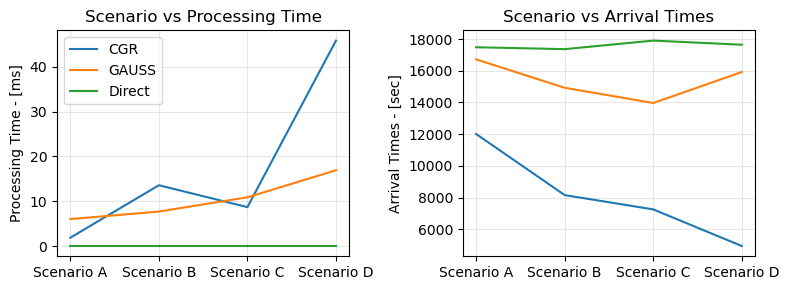

In [12]:
# Figura
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, num=4,figsize=(8, 3))



# Escenario vs ElapsedTimes
x = list(Paths.keys())
y_elapsedTimesCGRMean = []
y_elapsedTimesGNNMean = []
for scenarioName in Paths.keys():
    y_elapsedTimesCGRMean.append(np.mean(ElapsedTimesCGR[scenarioName]))
    y_elapsedTimesGNNMean.append(np.mean(ElapsedTimesGNN[scenarioName]))

ax1.plot(x, y_elapsedTimesCGRMean, color='tab:blue', linestyle='solid', label="CGR")
ax1.plot(x, y_elapsedTimesGNNMean, color='tab:orange', linestyle='solid', label="GAUSS")
ax1.plot(x, [0,0,0,0], color='tab:green', linestyle='solid', label="Direct")
#aux_label = Line2D([0], [0], color='tab:green', label='Direct')



ax1.set_title("Scenario vs Processing Time")
ax1.set_ylabel("Processing Time - [ms]")

#handles, labels = ax1.get_legend_handles_labels()
#handles.append(aux_label) 
#ax1.legend(handles=handles)
ax1.legend()
ax1.grid(alpha=0.3)


# Escenario vs ArrivalTimes
x = list(Paths.keys())
y_arrivalTimesCGRMean    = []
y_arrivalTimesGNNMean    = []
y_ArrivalTimesDirectMean = []
for scenarioName in Paths.keys():
    y_arrivalTimesCGRMean.append(np.mean(ArrivalTimesCGR[scenarioName]))
    aux = list(np.array(ArrivalTimesGNN[scenarioName])[np.array(ArrivalTimesGNN[scenarioName])!=None])
    y_arrivalTimesGNNMean.append(np.mean(aux))
    y_ArrivalTimesDirectMean.append(np.mean(ArrivalTimesDirect[scenarioName]))

ax2.plot(x, y_arrivalTimesCGRMean, color='tab:blue', linestyle='solid', label="CGR")
ax2.plot(x, y_arrivalTimesGNNMean, color='tab:orange', linestyle='solid', label="GAUSS")
ax2.plot(x, y_ArrivalTimesDirectMean, color='tab:green', linestyle='solid', label="Direct")

ax2.set_title("Scenario vs Arrival Times")
ax2.set_ylabel("Arrival Times - [sec]")
#ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Resumen.png')
plt.show()


### Tamaño de los archivos

In [10]:
scenarios=['Escenario 1','Escenario 3','Escenario 2','Escenario 4','Escenario 5','Escenario 6']
scenariosNames=['Scenario A','Scenario B','Scenario C','Scenario D','Scenario E','Scenario F']
GNN_model_Kib_list=[]
for scenario in scenarios:
    files = os.listdir(scenario + '/Checkpoints')
    GNN_model_Kib = 0
    for f in files:
        file_stats = os.stat(scenario + '/Checkpoints/' + f)
        GNN_model_Kib+=file_stats.st_size/1024

    GNN_model_Kib_list.append(GNN_model_Kib)


CP_Kib_list=[]
for scenario in scenarios:
    files = os.listdir(scenario + '/ContactPlan')
    CP_Kib = 0
    for f in files:
        if 'Long' in f:
            file_stats = os.stat(scenario + '/ContactPlan/' + f)
            CP_Kib+=file_stats.st_size/1024

    CP_Kib_list.append(CP_Kib)


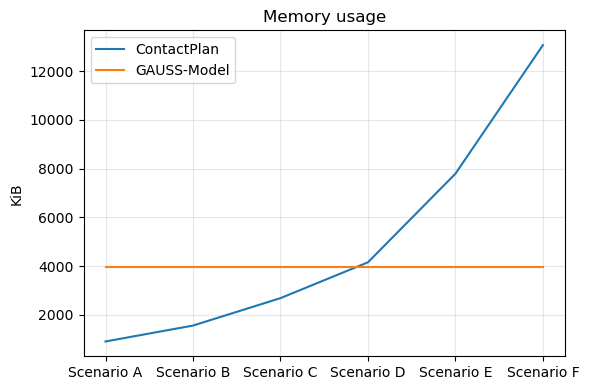

In [11]:
# Figura
#fig, (ax1, ax2) = plt.subplots(1, 1, sharex=False, num=5,figsize=(8, 3))

#ax1.plot(scenarios, GNN_model_Kib_list, color='tab:orange', linestyle='solid', label="GNN-Model")
#ax1.set_title("Memory usage")
#ax1.set_ylabel("KiB")
#ax1.legend()
#ax1.grid(alpha=0.3)

fig = plt.figure(5,figsize=(6, 4))
plt.plot(scenariosNames, CP_Kib_list, color='tab:blue', linestyle='solid', label="ContactPlan")
plt.plot(scenariosNames, GNN_model_Kib_list, color='tab:orange', linestyle='solid', label="GAUSS-Model")
plt.title("Memory usage")
plt.ylabel("KiB")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('Memory.png')
plt.show()

In [12]:
GNN_model_Kib_list

[3970.2841796875,
 3970.2841796875,
 3970.2841796875,
 3970.2841796875,
 3970.2841796875,
 3970.2841796875]